# 700752330
# Bhavani Bhimavaram!

1. Follow the instruction below and then report how the performance changed.(apply all at once)
• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
• Dropout layer at 20%.
• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
• Max Pool layer with size 2×2.
• Flatten layer.
• Dropout layer at 20%.
• Fully connected layer with 1024 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected layer with 512 units and a rectifier activation function.
• Dropout layer at 20%.
• Fully connected output layer with 10 units and a Softmax activation function
Did the performance change?

In [7]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()

# Layer 1: Conv2D with 32 filters, 3x3 size, ReLU activation, and Dropout of 20%
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))

# Layer 2: Conv2D with 32 filters, 3x3 size, ReLU activation, MaxPooling of 2x2
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Conv2D with 64 filters, 3x3 size, ReLU activation, and Dropout of 20%
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

# Layer 4: Conv2D with 64 filters, 3x3 size, ReLU activation, MaxPooling of 2x2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Conv2D with 128 filters, 3x3 size, ReLU activation, and Dropout of 20%
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

# Layer 6: Conv2D with 128 filters, 3x3 size, ReLU activation, MaxPooling of 2x2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Layer 7: Fully connected layer with 1024 units, ReLU activation, and Dropout of 20%
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Layer 8: Fully connected layer with 512 units, ReLU activation, and Dropout of 20%
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Layer 9: Fully connected output layer with 10 units and Softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
epochs = 5
lrate = 0.01
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Print model summary
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 64ms/step - accuracy: 0.2379 - loss: 2.0358 - val_accuracy: 0.4590 - val_loss: 1.4807
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4675 - loss: 1.4602 - val_accuracy: 0.5429 - val_loss: 1.2664
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5611 - loss: 1.2310 - val_accuracy: 0.5915 - val_loss: 1.1585
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6308 - loss: 1.0362 - val_accuracy: 0.6567 - val_loss: 0.9741
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6866 - loss: 0.8978 - val_accuracy: 0.6862 - val_loss: 0.8968
Accuracy: 68.62%


2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.

In [9]:
import numpy as np

# Predict the first 4 images
predictions = model.predict(X_test[:4])

# Convert predictions from one-hot encoded format to label format (argmax to get the index of max value)
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual labels of the first 4 images (also converting one-hot encoded labels to their actual class)
actual_classes = np.argmax(y_test[:4], axis=1)

# Display the results
for i in range(4):
    print(f"Image {i+1}:")
    print(f"Predicted Class: {predicted_classes[i]}")
    print(f"Actual Class: {actual_classes[i]}")
    print("Correct Prediction!" if predicted_classes[i] == actual_classes[i] else "Incorrect Prediction.")
    print("-" * 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image 1:
Predicted Class: 5
Actual Class: 3
Incorrect Prediction.
------------------------------
Image 2:
Predicted Class: 8
Actual Class: 8
Correct Prediction!
------------------------------
Image 3:
Predicted Class: 0
Actual Class: 8
Incorrect Prediction.
------------------------------
Image 4:
Predicted Class: 0
Actual Class: 0
Correct Prediction!
------------------------------


3. Visualize Loss and Accuracy using the history object

C:\Users\bhava\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 74ms/step - accuracy: 0.2725 - loss: 1.9759 - val_accuracy: 0.4554 - val_loss: 1.5035
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4954 - loss: 1.4054 - val_accuracy: 0.5867 - val_loss: 1.1623
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5834 - loss: 1.1746 - val_accuracy: 0.6446 - val_loss: 1.0056
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6403 - loss: 1.0108 - val_accuracy: 0.6718 - val_loss: 0.9370
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6825 - loss: 0.9030 - val_accuracy: 0.6765 - val_loss: 0.9299
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7104 - loss: 0.8192 - val_accuracy: 0.6940 - val_loss: 0.8880
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7312 - loss: 0.7557 - val_accuracy: 0.7134 - val_loss: 0.8330
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7554 

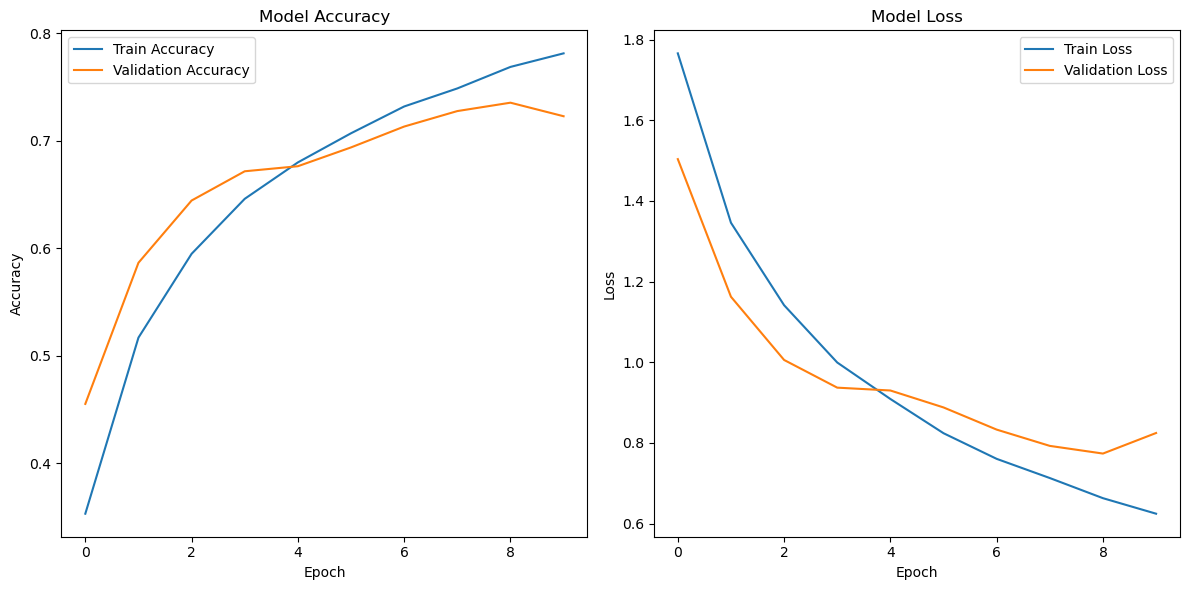

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import cifar10

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
epochs = 10
lrate = 0.01
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
